In [277]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [278]:
df = pd.read_csv('mergedData.csv')

Index(['Title', 'Year', 'Genre', 'Rating', 'Score', 'Director', 'Stars',
       'Gross', 'Popularity', 'Vote_Count', 'Id', 'Original_Language',
       'Original_Title', 'Genre_Ids', 'Vote_Average', 'Release_Date',
       'Revenue', 'Budget', 'Genre_y'],
      dtype='object')

0       Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...
1       Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...
2       Daniel Craig, Chris Evans, Ana de Armas, Jamie...
3       Ben Schwartz, James Marsden, Jim Carrey, Tika ...
4       Roman Griffin Davis, Thomasin McKenzie, Scarle...
                              ...                        
3995    Jean Reno, Christina Applegate, Christian Clav...
3996    Laura Linney, Philip Seymour Hoffman, Philip B...
3997    Morris Chestnut, Regina Hall, Romany Malco, Mi...
3998    Barbra Streisand, Seth Rogen, Julene Renee, Za...
3999    Diane Keaton, Geraldine Page, Kristin Griffith...
Name: Stars, Length: 4000, dtype: object

In [279]:
gross = df['Gross']
df['Log Gross']= np.log(df['Gross'])
rating = df['Rating']
#ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)

In [280]:

df = df.loc[df['Budget'] != 0]
gross = df['Gross']
df['Log Gross']= np.log(df['Gross'])
df['Budget'] = df['Budget']*1000000
df['Log Budget']= np.log(df['Budget'])
rating = df['Rating']



0.2081650421831829

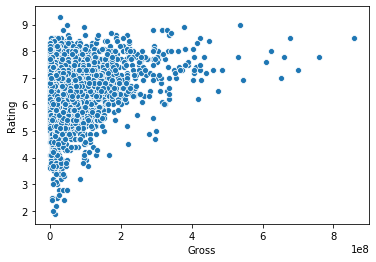

In [327]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)
df['Gross'].corr(df['Rating'])

In [331]:
df = df.loc[df['Score'] >= 1]

0.20022982059191596

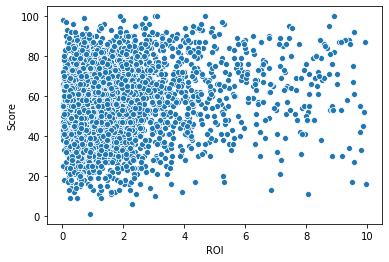

In [332]:
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = df)
df['ROI'].corr(df['Score'])

In [334]:
df = df.loc[df['Popularity'] <= 110]

0.06490572988988282

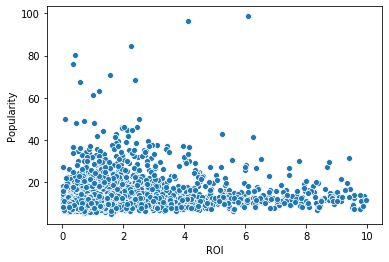

In [335]:
ax = sns.scatterplot(x = 'ROI',y = 'Popularity', data = df)
df['ROI'].corr(df['Popularity'])

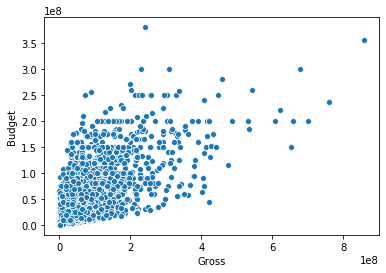

In [328]:
ax = sns.scatterplot(x = 'Gross',y = 'Budget', data = df)

In [306]:
df['Gross'].corr(df['Log Budget'])

0.538663222452542

In [283]:
df['ROI']=df['Gross']/df['Budget']

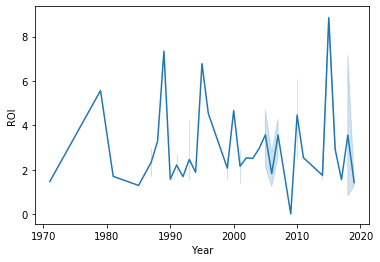

In [304]:
yvalues = df['ROI'].groupby(df['Year']).mean()
sns.lineplot(x = df['Year'], y = yvalues)

In [307]:
df = df.loc[df['ROI']<=10]
df = df.loc[df['Rating']>0.5]

In [308]:
score = df[['Director','Gross','Score','ROI']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating','ROI']].groupby('Rating').mean().sort_values('Gross', ascending = False)

genres = df[['Director','Gross','Genre','ROI']].groupby('Genre').mean().sort_values('Gross', ascending = False)


In [309]:
score['Score']=score.index
rating['Rating']=rating.index
genres['Genres']=genres.index
rating['Log Gross']=np.log(rating['Gross'])
score.reset_index(drop = True, inplace = True)
rating.reset_index(drop = True, inplace = True)
genres.reset_index(drop = True, inplace = True)

0.2081650421831829

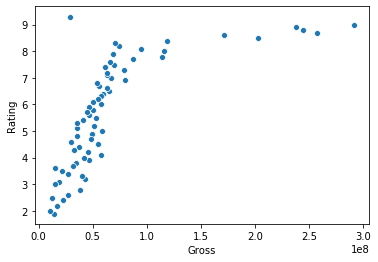

In [314]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = rating)
df['Rating'].corr(df['Gross'])

0.09212710149988791

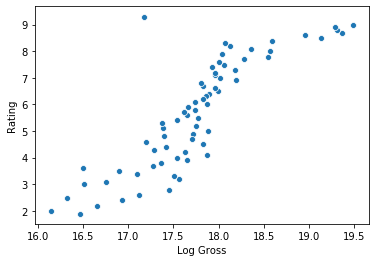

In [313]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = rating)
df['Rating'].corr(df['Log Gross'])

0.20473678045673213

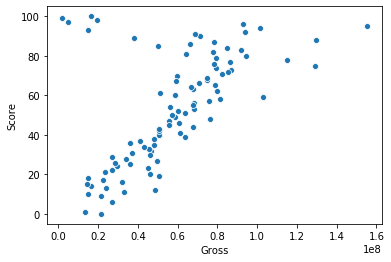

In [323]:

ax = sns.scatterplot(x = 'Gross',y = 'Score', data = score)
df['Score'].corr(df['Gross'])


0.19385666437137636

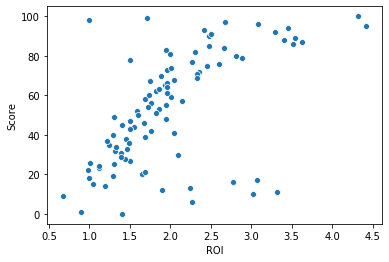

In [320]:
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = score)
df['Score'].corr(df['ROI'])


In [187]:
rating.corr()
df.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,...,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y,Log Gross,Log Budget,ROI
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",51479136,148.987,4756,...,기생충,"[35, 18, 53]",8.6,2019-05-30,201.06,11360000.0,"['Comedy', 'Drama', 'Thriller']",17.756687,16.245609,4.531614
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",28205665,215.930,174,...,The Invisible Man,"[27, 9648, 878, 53]",7.5,2020-02-26,0.00,9000000.0,"['Horror', 'Mystery', 'Science Fiction', 'Thri...",17.155033,16.012735,3.133963
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",164655243,96.543,2485,...,Knives Out,"[35, 80, 18, 9648, 53]",7.8,2019-11-27,163.70,40000000.0,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",18.919364,17.504390,4.116381
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"Ben Schwartz, James Marsden, Jim Carrey, Tika ...",128555045,217.757,546,...,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,2020-02-12,265.49,85000000.0,"['Action', 'Comedy', 'Science Fiction', 'Family']",18.671868,18.258162,1.512412
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"Roman Griffin Davis, Thomasin McKenzie, Scarle...",33122789,68.363,2208,...,Jojo Rabbit,"[35, 18, 10752]",8.1,2019-10-18,82.47,14000000.0,"['Comedy', 'Drama', 'War']",17.315732,16.454568,2.365914


In [188]:
df['Genre'] = df['Genre'].apply(lambda x:x.split())
df['Genre1'] = df['Genre'].apply(lambda x:x[0])


In [189]:
def genres_Split(list):
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def genres_Split2(list):
    try:
        x = list[2]
    except:
        x = list[0]
    return x


In [191]:
df['Genre2'] = df['Genre'].apply(lambda x:genres_Split(x))
df['Genre3'] = df['Genre'].apply(lambda x:genres_Split2(x))



In [192]:
type(df['Stars'][0])

str

In [338]:
stars = df['Stars'].str.split(",",n=1,expand = True)

In [339]:
df['Star1'] = stars[0]
df['Star2'] = stars[1]

In [340]:
stars2 = df['Star2'].str.split(",",n=1,expand = True)

In [341]:
df['Star2'] = stars2[0]

In [358]:
test = df.groupby('Star1').count()


In [342]:
stars = df[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star1').mean().sort_values('ROI', ascending = False)
stars2 = df[['Star1', 'Star2','Gross','ROI', 'Log Gross']].groupby('Star2').mean().sort_values('ROI', ascending = False)



In [240]:
stars

,Gross,ROI
Star1,,
Melanie Kinnaman,21930418.0,9.968372
Prince,70261052.0,9.758479
Barry Newman,12442673.0,9.571287
Warwick Davis,8556940.0,9.507711
Sylvia Kristel,26279000.0,9.385357
...,...,...
Isabelle Huppert,301718.0,0.022185
Yi Zhang,1543547.0,0.022051
Bruce Greenwood,605562.0,0.015139


In [343]:
stars2

,Gross,ROI,Log Gross
Star2,,,
John Shepherd,21930418.0,9.968372,16.903385
John Randolph,29800000.0,9.933333,17.210019
Dennis Alexio,14697005.0,9.798003,16.503154
Lori Singer,80035402.0,9.760415,18.197980
Apollonia Kotero,70261052.0,9.758479,18.067728
...,...,...,...
Jean-Louis Trintignant,301718.0,0.022185,12.617248
David Crow,605562.0,0.015139,13.313912
Gabriel Bateman,1115008.0,0.014867,13.924372


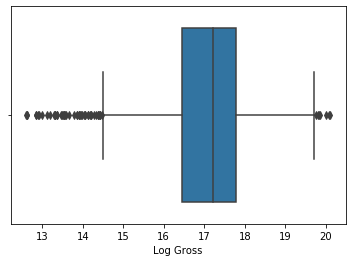

In [345]:
sns.boxplot(stars['Log Gross'])

In [255]:
stars_greater1 = stars.loc[stars['ROI']>=1]

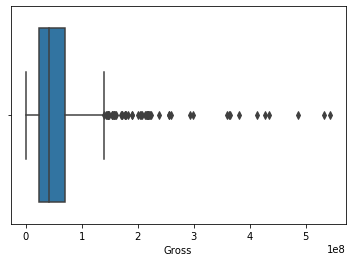

In [360]:
sns.boxplot(stars_greater1['Gross'])

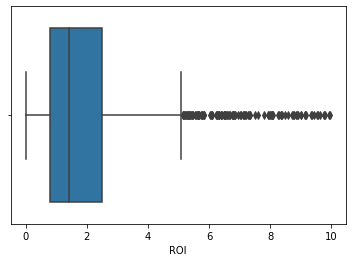

In [257]:
sns.boxplot(stars2['ROI'])

In [259]:
stars2_greater1 = stars2.loc[stars2['ROI']>=1]

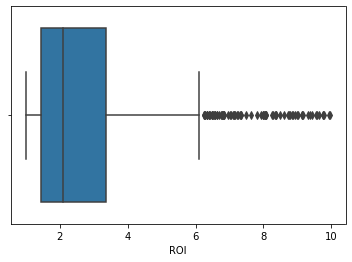

In [260]:
sns.boxplot(stars2_greater1['ROI'])